<img src="https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true" height = 200 width=200 alt=" ">  

# Análisis de problemas cardiacos

**Descripción:** Análisis de y predicción de problemas de ataques al carodiacos  

|Email|Fecha|
|-----|-----|
|luishernandezmatos@yahoo.com|18 de junio 2020|

## Contenido  
1. [Librerias](#Librerias)
1. [Dataset](#Cargar-dataset:)
1. [Datos Generales del dataset](#Verificacion-General--de-los-datos)
1. [Preparar los datos](#Preparar-los-datos)
1. [Análisis de datos](#Analisis)
1. [Crear variables X, y](#Variable-dependiente-y-variables-independiente)
1. [Dividir los datos en enrenamiento y testing](#Split-the-data)
1. [Estandarizar los datos](#Estandarizar-las-Variables)
1. [Crear los modelos](#Modelo)
1. [Evaluación de los modelos](#Evaluar-el-modelo)

### Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Cargar dataset:  
[cardio.csv](https://raw.githubusercontent.com/iryndin/Machine-Learning/master/data/01-cardio/cardio.csv)

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/iryndin/Machine-Learning/master/data/01-cardio/cardio.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Verificacion General  de los datos
1. [x] cantidad de registros y columnas
1. [x] información general
1. [x] tipos de datos
1. [x] Correlación 
1. [x] Estadística General
1. [x] chequeo de datos nulos

---  

**Descripción del dataset:**

|Variable|Objetivo|nombre columna|Descripción|
|-----|-----|------------|-----|
|Age | Objective Feature | age | int (days)|  
|Height | Objective Feature | height | int (cm)|      
|Weight | Objective Feature | weight | float (kg)|    
|Gender | Objective Feature | gender | 1 - women, 2 - men|  
|Systolic blood pressure | Examination Feature | ap_hi | int|  
|Diastolic blood pressure | Examination Feature | ap_lo | int|  
|Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal|  
|Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |  
|Smoking | Subjective Feature | smoke | binary |  
|Alcohol intake | Subjective Feature | alco | binary |  
|Physical activity | Subjective Feature | active | binary |  
|Presence or absence of cardiovascular disease | Target Variable | cardio | binary |  

---

In [58]:
# dimensión de los datos
df.shape

(70000, 15)

In [6]:
#información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
#tipos de datos
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

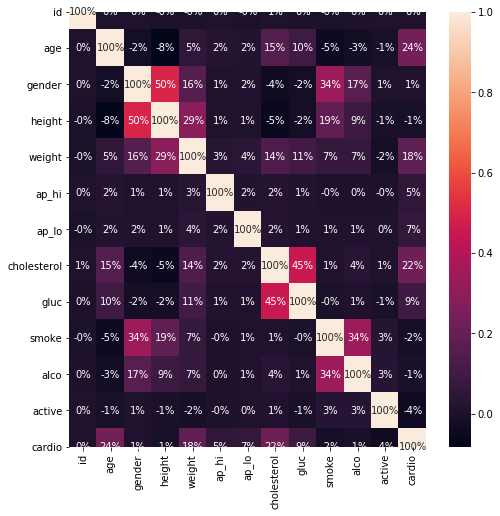

In [10]:
#correlación
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.show()

In [9]:
#estadística General
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


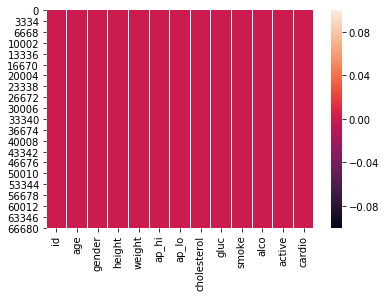

In [11]:
#datos nulos
sns.heatmap(df.isnull())

### Preparar los datos
1. [x] La variable age

In [12]:
# crear variable edad expresada en años
df['edad'] = df.age//365
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,edad
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


### Analisis
1. [x] [Cantidad de personas con problemas cardiacos](#Cantidad-de-Personas-con-ataques-cardiaco)
1. [x] [como estan estructurados por edad](#Verificar-los-problemas-card%C3%ADacos-por-edad)
1. [x] [La cantidad por Genero](#Cantidad-de-personas-con-problemas-card%C3%ADacos-por-Genero)
1. [x] [Análisis del genero femenino](#An%C3%A1lisis-del-sexo-femenino-con-problemas-de-ataque-card%C3%ADaco)
1. [x] [Cantidad de mujeres con ataques cardiacos por edad](#cantidad-por-edad-de-mujeres-con-problemas-card%C3%ADacos-que-fuman)
1. [x] [Cantidad de mujeres fumadoras, con colesterol](#cantidad-Mujeres-fumadoras-y-su-tipo-de-colesterol)
1. [x] [correlación de los datos del genero femenino](#Correlaci%C3%B3n-de-las-mujeres-con-problemas-cardiaco)

#### Cantidad de Personas con ataques cardiaco

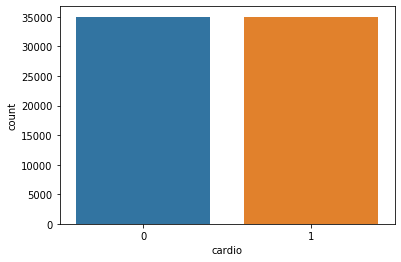

In [13]:
sns.countplot(df.cardio)

In [19]:
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [26]:
df.cardio.value_counts(normalize = True)*100

0    50.03
1    49.97
Name: cardio, dtype: float64

La cantidad de personas con problemas  cardiacos es de **3,4979** esto equivale a un **49.97%**.

#### Verificar los problemas cardíacos por edad

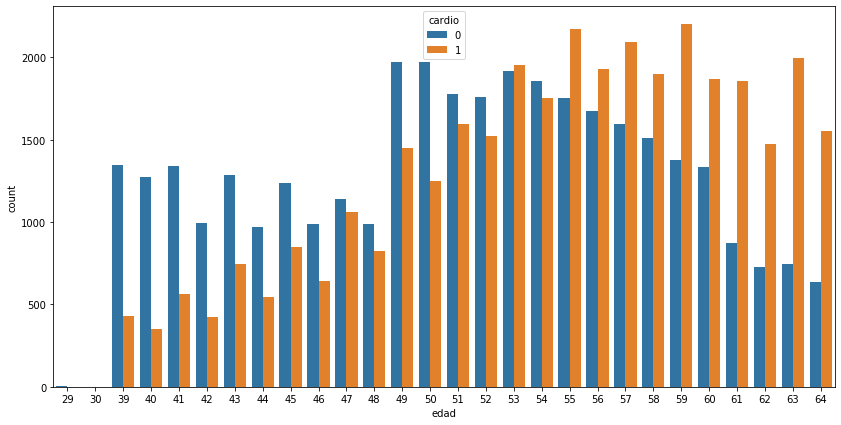

In [31]:
plt.figure(figsize= (14,7))
sns.countplot(df.edad, hue=df.cardio)
plt.show()

In [50]:
df['conteo'] =1
a = df.pivot_table(index='edad', columns='cardio', values='conteo', aggfunc='sum')
a.tail(11)

cardio,0,1
edad,,
54,1855.0,1750.0
55,1755.0,2172.0
56,1676.0,1931.0
57,1594.0,2092.0
58,1510.0,1899.0
59,1377.0,2199.0
60,1332.0,1868.0
61,871.0,1857.0
62,724.0,1475.0


In [38]:
a.columns

Int64Index([0, 1], dtype='int64', name='cardio')

In [48]:
d = a[a.loc[:, 1]> a.loc[:, 0]]
d.index

Int64Index([53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64], dtype='int64', name='edad')

En el gráfico anterior pudimos observar que **las personas con edad entre 53-64 años**,  hay mas casos mayor casos con problemas que los que no tienen

#### Cantidad de personas con problemas cardíacos por Genero

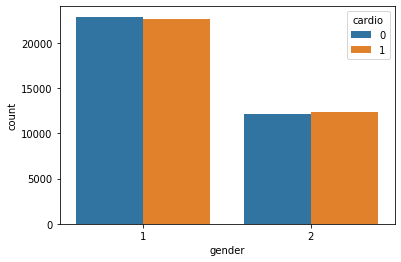

In [52]:
sns.countplot(df.gender, hue=df.cardio)

In [93]:
df.pivot_table(index = 'gender', columns= 'cardio', values='conteo', aggfunc='sum', margins=True, margins_name='Total')

cardio,0,1,Total
gender,,,
1,22914,22616,45530
2,12107,12363,24470
Total,35021,34979,70000


In [98]:
#procentaje
mujeres = (22616/70000)*100
hombres= (12363/70000)*100
print('Procentaje de mujeres con problemas cardiacos', round(mujeres,2),'%')
print('Procentaje de hombres con problemas cardiacos', round(hombres,2),'%')

Procentaje de mujeres con problemas cardiacos 32.31 %
Procentaje de hombres con problemas cardiacos 17.66 %


La cantidad de mujeres con problemas cardíacos es mayor a la de los hombres, registrando una cantidad:  mujeres  22,616 y hombres es de 12,363.  
Esto nos indica  que del 49.97% con problemas cardíacos el 32.31% corresponde al genero femenino

#### Análisis del sexo femenino con problemas de ataque cardíaco

In [140]:
mujeres_all = df.query('gender ==1')
mujeres_all.smoke.value_counts(normalize= True)

0    0.982144
1    0.017856
Name: smoke, dtype: float64

El porcentaje de mujeres no fumadoras es de un 98% versus la que si fuman que es de un 0.017%

In [120]:
mujeres = df.query('gender ==1 and cardio ==1 ')
mujeres_smoke = mujeres.query('smoke==1')
mujeres_smoke

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,edad,conteo
59,74,20431,1,164,64.0,180,90,1,1,1,0,1,1,55,1
207,286,21086,1,161,68.0,120,70,3,3,1,0,1,1,57,1
566,813,18382,1,161,87.0,110,90,1,1,1,0,1,1,50,1
613,886,18963,1,165,92.0,140,1000,1,1,1,0,1,1,51,1
737,1037,16808,1,160,77.0,140,90,2,2,1,0,0,1,46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69246,98903,18203,1,158,96.0,140,90,2,1,1,0,0,1,49,1
69424,99165,16564,1,172,102.0,130,90,3,1,1,0,0,1,45,1
69482,99239,21211,1,165,69.0,140,90,1,1,1,1,1,1,58,1
69494,99259,21311,1,157,54.0,130,80,1,1,1,0,1,1,58,1


##### cantidad por edad de mujeres con problemas cardíacos que fuman

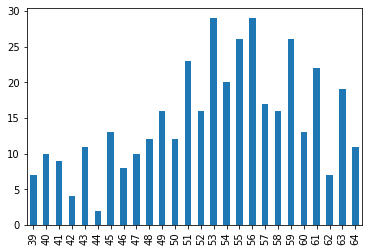

In [123]:
mujeres_smoke.edad.value_counts().sort_index().plot(kind='bar')

In [136]:
mujeres_smoke.edad.value_counts().head(15)

56    29
53    29
59    26
55    26
51    23
61    22
54    20
63    19
57    17
58    16
52    16
49    16
60    13
45    13
50    12
Name: edad, dtype: int64

##### Catidad de mujeres por tipo de colesterol

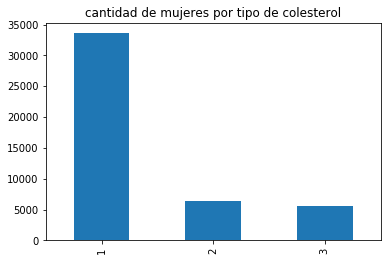

In [143]:
plt.title('cantidad de mujeres por tipo de colesterol', fontsize = 12)
mujeres_all.cholesterol.value_counts().plot(kind='bar')
plt.show()

##### cantidad Mujeres fumadoras y su tipo de colesterol

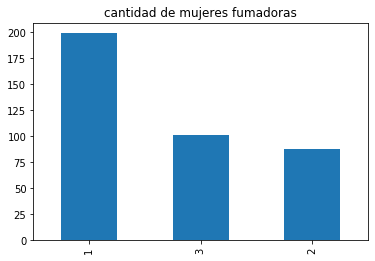

In [144]:
plt.title('cantidad de mujeres fumadoras', fontsize = 12)
mujeres_smoke.cholesterol.value_counts().plot(kind='bar')
plt.show()

##### Correlación de las mujeres con problemas cardiaco 

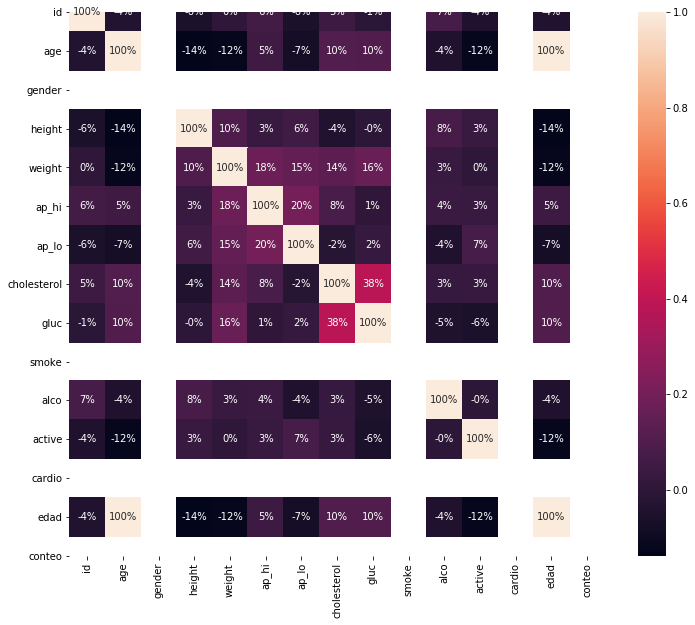

In [164]:
plt.figure(figsize=(12,10))
sns.heatmap(mujeres_smoke.corr(), annot=True, fmt='.0%')
plt.show()

Existe una correlación de las mujeres que fuman que han tenido problemas de ataques cardíacos con nivel de colesterol y glucosa

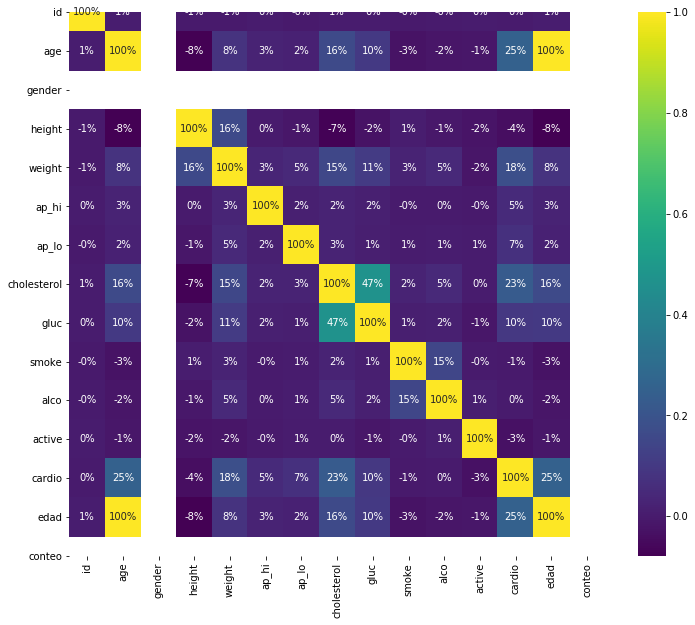

In [163]:
plt.figure(figsize=(12,10))
sns.heatmap(mujeres_all.corr(), annot=True, fmt='.0%', cmap='viridis')
plt.show()

la correlación existente para el sexo femenino se deben a que hay una gran reación del nivel de azucar y colesterol.

### Variable dependiente y variables independiente

In [166]:
X =df.drop(['id', 'age', 'conteo', 'cardio'], axis = 'columns')
y = df.cardio
X.shape, y.shape

((70000, 11), (70000,))

### Split the data

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((52500, 11), (52500,), (17500, 11), (17500,))

### Estandarizar las Variables

In [170]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Modelo  
1. [x] Random Forest
1. [x] xgboost

In [172]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=1)
rfc.fit(X_train_sc, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [175]:
y_pred = rfc.predict(X_test_sc)

In [187]:
print('Porcentaje del modelo en los datos de Entrenamiento:' ,round(rfc.score(X_train_sc, y_train)*100,2), '%')

Porcentaje del modelo en los datos de Entrenamiento: 98.13 %


In [188]:
print('Procentaje de Aprendizaje del modelo en los datos de testeo:' ,round(rfc.score(X_test_sc, y_test)*100,2), '%')

Procentaje de Aprendizaje del modelo en los datos de testeo: 70.8 %


In [190]:
import xgboost
from xgboost import XGBClassifier

In [224]:
xgc= XGBClassifier(random_state = 1, subsample=0.8, learning_rate =0.1 )
xgc.fit(X_train_sc, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=1, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
       validate_parameters=False, verbosity=None)

In [225]:
xg_pred = xgc.predict(X_test_sc)

In [226]:
print('Porcentaje del modelo en los datos de Entrenamiento:' ,round(xgc.score(X_train_sc, y_train)*100,2), '%')
print('Procentaje de Aprendizaje del modelo en los datos de testeo:' ,round(xgc.score(X_test_sc, y_test)*100,2), '%')

Porcentaje del modelo en los datos de Entrenamiento: 75.16 %
Procentaje de Aprendizaje del modelo en los datos de testeo: 73.65 %


### Evaluar el modelo
1. [x] Random Forest
1. [x] xgboost

In [177]:
from sklearn import metrics

In [179]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      8609
           1       0.72      0.70      0.71      8891

   micro avg       0.71      0.71      0.71     17500
   macro avg       0.71      0.71      0.71     17500
weighted avg       0.71      0.71      0.71     17500



In [180]:
#matrix de confusión
metrics.confusion_matrix(y_test, y_pred)

array([[6169, 2440],
       [2670, 6221]], dtype=int64)

In [227]:
#xgboost
print(metrics.classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      8609
           1       0.76      0.70      0.73      8891

   micro avg       0.74      0.74      0.74     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.74      0.74      0.74     17500



In [228]:
#xgboost
metrics.confusion_matrix(y_test, xg_pred)

array([[6673, 1936],
       [2676, 6215]], dtype=int64)